In [2]:
%matplotlib inline
from equadratures import *
import numpy as np

<h1> Computing 1D Gauss points </h1>

The objective of this note is to demonstrate how various linear algebra (and convex optimization) heuristics can be used for finding the Gauss quadrature points!

In [27]:
K = 100
Mi = 8
x1 = Parameter(distribution='Uniform', order=K, lower=-1., upper=1.)
x2 = Parameter(distribution='Uniform', order=Mi, lower=-1., upper=1.)
totalorder = Basis('Total order', [Mi])

In [28]:
SVD = Polylsq(parameters=[x1], basis=totalorder, mesh='tensor', optimization='greedy-svd', oversampling=1.0)
LU = Polylsq(parameters=[x1], basis=totalorder, mesh='tensor', optimization='greedy-lu', oversampling=1.0)
QR = Polylsq(parameters=[x1], basis=totalorder, mesh='tensor', optimization='greedy-qr', oversampling=1.0)
NEWTON = Polylsq(parameters=[x1], basis=totalorder, mesh='tensor', optimization='newton', oversampling=1.0)
GRID = Polylsq(parameters=[x1], basis=totalorder, mesh='tensor', optimization='greedy-qr', oversampling=1.0)
pts_SVD = SVD.quadraturePoints
pts_LU = LU.quadraturePoints
pts_QR = QR.quadraturePoints
pts_NEWTON = NEWTON.quadraturePoints
pts_optimal, ___ = x2._getLocalQuadrature()
pts_large, ___ = GRID.getTensorQuadratureRule()

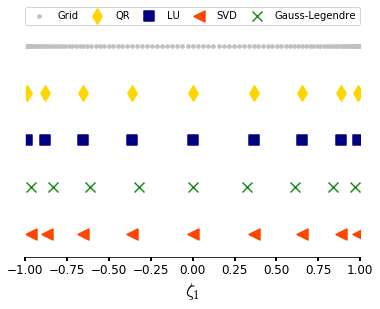

In [30]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.scatter(pts_large[:,0], 0.1+np.zeros((K+1, 1)), marker='o', s=10, color='silver',linewidth=1.5, label='Grid')
plt.scatter(pts_QR[:,0], 0.05 + np.zeros((Mi+1, 1)), marker='d', s=120, color='gold',linewidth=1.5, label='QR')
plt.scatter(pts_LU[:,0], np.zeros((Mi+1, 1)), marker='s', s=120, color='navy',linewidth=1.5, label='LU')
plt.scatter(pts_SVD[:,0], np.zeros((Mi+1, 1)) - 0.1, marker='<', s=120, color='orangered',linewidth=1.5, label='SVD')
#plt.scatter(pts_NEWTON[:,0], np.zeros((Mi+1, 1)) - 0.15, marker='o', s=100, color='limegreen',linewidth=1.5, label='Newton')
plt.scatter(pts_optimal[:,0], np.zeros((Mi+1, 1)) -0.05,  marker='x', s=100, color='forestgreen',linewidth=1.5, label='Gauss-Legendre')
adjust_spines(ax, ['bottom'])
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,ncol=5, mode="expand", borderaxespad=0., fontsize=10)
frame1 = plt.gca()
ax.set_yticks([])
plt.gca().axes.get_yaxis().set_visible(False)
plt.xlim([-1, 1])
ax.spines['left'].set_color('white')
plt.xlabel('$\zeta_1$')
plt.savefig('GP_8.eps', dpi=200, bbox_inches='tight', pad_inches=0.1)
plt.show()

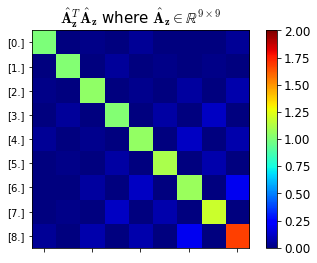

In [8]:
M = np.dot(NEWTON.Az.T , NEWTON.Az)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(M, interpolation='nearest', cmap=cm.jet, vmin=0., vmax=2.0)
plt.colorbar()
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
ticks = []
for i in range(0, totalorder.cardinality):
    ticks.append(str(totalorder.elements[i,:]))
plt.yticks(np.arange(totalorder.cardinality), ticks, fontsize=10)
mm, nn = NEWTON.Az.shape
titlestring = r'$\hat{\mathbf{A}}^T_{\mathbf{z}} \hat{\mathbf{A}}_{\mathbf{z}} $ where $\hat{\mathbf{A}}_{\mathbf{z}}\in \mathbb{R}^{%s \times %s}$'%(mm, nn)
plt.title(titlestring,fontsize=15)
plt.savefig('NEWTON_MAP.eps' , dpi=200)
plt.show()

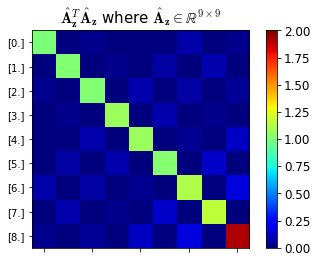

In [9]:
M = np.dot(LU.Az.T , LU.Az)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(M, interpolation='nearest', cmap=cm.jet, vmin=0., vmax=2.0)
plt.colorbar()
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
ticks = []
for i in range(0, totalorder.cardinality):
    ticks.append(str(totalorder.elements[i,:]))
plt.yticks(np.arange(totalorder.cardinality), ticks, fontsize=10)
mm, nn = LU.Az.shape
titlestring = r'$\hat{\mathbf{A}}^T_{\mathbf{z}} \hat{\mathbf{A}}_{\mathbf{z}} $ where $\hat{\mathbf{A}}_{\mathbf{z}}\in \mathbb{R}^{%s \times %s}$'%(mm, nn)
plt.title(titlestring,fontsize=15)
plt.savefig('LU_MAP.eps' , dpi=200)
plt.show()

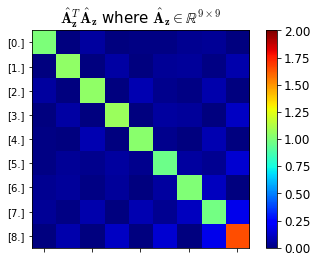

In [10]:
M = np.dot(SVD.Az.T , SVD.Az)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(M, interpolation='nearest', cmap=cm.jet, vmin=0., vmax=2.0)
plt.colorbar()
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
ticks = []
for i in range(0, totalorder.cardinality):
    ticks.append(str(totalorder.elements[i,:]))
plt.yticks(np.arange(totalorder.cardinality), ticks, fontsize=10)
mm, nn = SVD.Az.shape
titlestring = r'$\hat{\mathbf{A}}^T_{\mathbf{z}} \hat{\mathbf{A}}_{\mathbf{z}} $ where $\hat{\mathbf{A}}_{\mathbf{z}}\in \mathbb{R}^{%s \times %s}$'%(mm, nn)
plt.title(titlestring,fontsize=15)
plt.savefig('SVD_MAP.eps' , dpi=200)
plt.show()

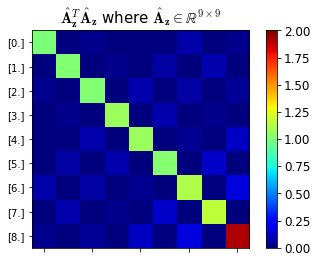

In [11]:
M = np.dot(QR.Az.T , QR.Az)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.imshow(M, interpolation='nearest', cmap=cm.jet, vmin=0., vmax=2.0)
plt.colorbar()
frame1 = plt.gca()
frame1.axes.xaxis.set_ticklabels([])
ticks = []
for i in range(0, totalorder.cardinality):
    ticks.append(str(totalorder.elements[i,:]))
plt.yticks(np.arange(totalorder.cardinality), ticks, fontsize=10)
mm, nn = QR.Az.shape
titlestring = r'$\hat{\mathbf{A}}^T_{\mathbf{z}} \hat{\mathbf{A}}_{\mathbf{z}} $ where $\hat{\mathbf{A}}_{\mathbf{z}}\in \mathbb{R}^{%s \times %s}$'%(mm, nn)
plt.title(titlestring,fontsize=15)
plt.savefig('QR_MAP.eps' , dpi=200)
plt.show()